## Query

SELECT limit_balance, sex, education_level, marital_status, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt_1, bill_amt_2, bill_amt_3, bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, default_payment_next_month FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 4000

## i. Perkenalan

### Muhammad Fadhil Sadeli
### BATCH 002

## OBJECTIVES

Milestones 1 ini dibuat guna mengevaluasi Pembelajaran Phase 1 dalam konsep Supervised Learning sebagai berikut:

- Mampu memperoleh data menggunakan BigQuery
- Mampu memahami konsep supervised learning
- Mampu mempersiapkan data untuk digunakan dalam model supervised learning
- Mampu mengimplementasikan supervised learning dengan data yang diberikan
- Mampu melakukan evaluasi model
- Mampu melakukan model tuning

## ii. Import Libraries

`Memasukkan library yang digunakan`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import MinMaxScaler

## iii. Data Loading

`Import dataset`

In [2]:
data = pd.read_csv('h8dsft_P1M1_Muhammad_Fadhil_Sadeli.csv', skipinitialspace = True)
data.head()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000,1,3,0,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,0,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0


In [3]:
data.tail()

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0
2964,100000,2,1,2,28,0,0,0,2,0,...,10775,10998,12655,1300,3005,0,700,2000,1500,0


`Mengecek informasi data`

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

`Mencari missing value pada data`

In [5]:
data.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

`Mencari berapa banyak baris data yang duplicate`

In [6]:
data[data.duplicated()].shape

(1, 24)

In [7]:
# check unique value in education level
data['education_level'].unique()

array([3, 1, 2, 5, 6, 4, 0], dtype=int64)

In [8]:
# check unique value in maritas_status
data['marital_status'].unique()

array([0, 1, 2, 3], dtype=int64)

In [9]:
# check unique value in pay_0
data['pay_0'].unique()

array([ 0, -2,  2, -1,  3,  1,  4,  5,  7,  8,  6], dtype=int64)

`Describe`
- `limit_balance`   : Amount of given credit in NT dollars (includes individual and family/supplementary credit)        
- `sex` : Gender (1=male, 2=female)
- `education_level` : Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)          
- `marital_status`  : Marital status (1=married, 2=single, 3=others)           
- `age` : Age in years            
- `pay_0`   : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)           
- `pay_2`   : Repayment status in August, 2005 (scale same as above) 
- `pay_3`   : Repayment status in July, 2005 (scale same as above)               
- `pay_4`   : Repayment status in June, 2005 (scale same as above)              
- `pay_5`   : Repayment status in May, 2005 (scale same as above)              
- `pay_6`   : Repayment status in April, 2005 (scale same as above)               
- `bill_amt_1`  : Amount of bill statement in September, 2005 (NT dollar)             
- `bill_amt_2`  : Amount of bill statement in August, 2005 (NT dollar)             
- `bill_amt_3`  : Amount of bill statement in July, 2005 (NT dollar)             
- `bill_amt_4`  : Amount of bill statement in June, 2005 (NT dollar)             
- `bill_amt_5`  : Amount of bill statement in May, 2005 (NT dollar)             
- `bill_amt_6`  : Amount of bill statement in April, 2005 (NT dollar)             
- `pay_amt_1`   : Amount of previous payment in September, 2005 (NT dollar)              
- `pay_amt_2`   : Amount of previous payment in August, 2005 (NT dollar)              
- `pay_amt_3`   : Amount of previous payment in July, 2005 (NT dollar)              
- `pay_amt_4`   : Amount of previous payment in June, 2005 (NT dollar)              
- `pay_amt_5`   : Amount of previous payment in May, 2005 (NT dollar)              
- `pay_amt_6`   : Amount of previous payment in April, 2005 (NT dollar)              
- `default_payment_next_month`  : Default payment (1=yes, 0=no)

`Berdasarkan general overview yang didapat:`
- Seluruh kolom mempunyai tipe data int, sehingga bisa dikatakan keseluruhan kolom berisi angka angka saja baik numerikal maupun kategorikal 
- Pada data frame mempunyai duplicate data sebanyak 1 baris data saja
- Pada kolom pay_0 mempunyai nama yang missleading sehingga perlu diganti menjadi pay_1 agar sama urutannya seperti kolom bill_amt dan pay_amt sesuai dengan bulannya
- Pada kolom education level mempunyai unique value 0,1,2,3,4,5, dan 6. Yang dimana kolom 0, 5 dan 6 mempunyai nilai yang sama yaitu unknown sehingga kolom tersebut bisa digabung dengan unique 4 atau others
- Pada kolom marital status mempunyai unique value 0,1,2, dan 3. Dikarenakan unique value 0 tidak mempunyai definisi yang jelas sehingga unique value 0 tersebut dianggap sama dengan others atau unique value 3
- Pada kolom Pay hingga -2,-1,0,1,2,3,4,5,6,7,8, dan 9. Unique value -2 pada kolom pay bermakna orang tersebut membayar tagihan kredit 2 bulan lebih cepat sebelum jatuh tempo, begitupun dengan -1 yang berarti 1 bulan lebih cepat dan unique value 0 yang berarti pembayaran sesuai dengan jatuh tempo. Sedangkan untuk nilai 1 hingga 9 berarti pembayaran tagihan kredit telat satu bulan untuk value bernilai 1 dan 9 yang berati telat 9 bulan sesuai dengan unique valuenya.
- Pada kolom bill_amt didefinisi sebagai total tagihan di setiap bulannya, sesuai dengan unique valuenya seperti kolom pay
- Begitupun juga dengan pada kolom pay_amt didefinisi sebagai total pembayaran di setiap bulannya, sesuai dengan unique valuenya seperti kolom pay dan kolom  bill_amt
- Pada kolom default_payment_next_month merupakan kolom target yang mempunyai unique value 0 dan 1. Nilai 1 yang berarti default payment dan 0 yang berarti tidak default payment. Lalu pada kolom cleaning section, nama kolom tersebut akan diubah menjadi payment agar mudah pembacaannya
- Maksud dari Default Payment adalah jika YES atau 1 berarti orang tersebut dinyatakan telat membayar tagihan kredit sedangakan untuk NO atau 0 berarti orang tersebut sudah melakukan pembayaran tagihan kredit dengan tepat waktu


## Data cleaning

`Pada section ini akan melakukan proeses cleaning seperti berikut:`
- Menghapus duplicate data sebanyak satu baris
- Mengganti nama kolom pay_0 menjadi pay_1 dan default_payment_next_month menjadi payment
- Menggabungkan unique value 0, 5, dan 4 di kolom education level menjadi satu unique aja yaitu 4 saja
- Menggabungkan unique value 0 dengan unique value 3 pada kolom marital status 

In [10]:
#Mengcopy data
data_clean = data.copy()

In [11]:
#Mengapus duplicate data
data_clean.drop_duplicates(inplace=True)
data_clean[data.duplicated()].shape

(0, 24)

In [12]:
#Mengganti nama kolom
data_clean.rename({"pay_0":"pay_1","default_payment_next_month":"payment"},axis=1,inplace=True)

In [13]:
#Mengganti unique value
data_clean['education_level'] = data_clean['education_level'].replace({0:4,5:4,6:4})
data_clean['marital_status'] = data_clean['marital_status'].replace({0:3})

In [14]:
#check value count pada education level
data_clean['education_level'].value_counts()

2    1400
1    1038
3     483
4      43
Name: education_level, dtype: int64

In [15]:
#check value count pada marital_status
data_clean['marital_status'].value_counts()

2    1594
1    1331
3      39
Name: marital_status, dtype: int64

In [16]:
data_clean

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
0,50000,1,3,3,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,3,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0


## iv. Exploratory Data Analysis (EDA) Analysis

`Selanjutnya memvisualisasi distribusi kelas 0 dan kelas 1 pada kolom target`

Text(0.5, 1.0, 'Payment Distribution Plot')

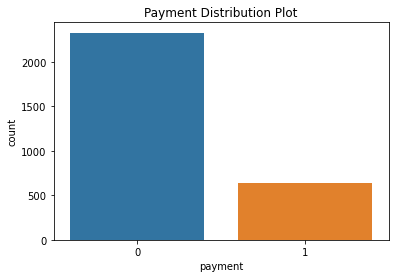

In [79]:
sns.countplot(data=data_clean,x='payment')
plt.title('Payment Distribution Plot')

In [84]:
data_clean[data_clean['payment'] == 1].count()

limit_balance      635
sex                635
education_level    635
marital_status     635
age                635
pay_1              635
pay_2              635
pay_3              635
pay_4              635
pay_5              635
pay_6              635
bill_amt_1         635
bill_amt_2         635
bill_amt_3         635
bill_amt_4         635
bill_amt_5         635
bill_amt_6         635
pay_amt_1          635
pay_amt_2          635
pay_amt_3          635
pay_amt_4          635
pay_amt_5          635
pay_amt_6          635
payment            635
dtype: int64

`Pada kolom target mempunyai data yang imbalanced dikarenakan kelas 0 dan kelas 1 mempunyai perbandingan yang cukup jauh`

`Selanjutnya memvisualisasi persebaran data jenis kelamin pada kolom target`

<AxesSubplot:xlabel='payment', ylabel='count'>

<Figure size 576x288 with 0 Axes>

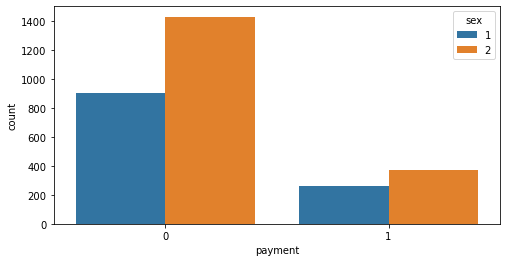

In [18]:
plt.figure(figsize=(8,4))
fig, axes = plt.subplots(figsize=(8,4))
sns.countplot(x = 'payment', hue = 'sex', data = data_clean)

`Jenis kelamin perempuan paling banyak disetiap kelas payment yaitu 0 maupun 1`

`Selanjutnya memvisualisasi persebaran data education level pada kolom target`

<AxesSubplot:xlabel='payment', ylabel='count'>

<Figure size 576x288 with 0 Axes>

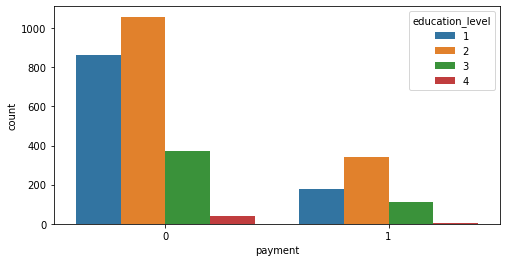

In [19]:
plt.figure(figsize=(8,4))
fig, axes = plt.subplots(figsize=(8,4))
sns.countplot(x = 'payment', hue = 'education_level', data = data_clean)

`Education level yang paling banyak di setiap kelas payment adalah university, sedangkan yang paling sedikit di kedua kelas adalah others atau unknown` 

`Selanjutnya memvisualisai persebaran data maritral status pada kolom target`

<AxesSubplot:xlabel='payment', ylabel='count'>

<Figure size 576x288 with 0 Axes>

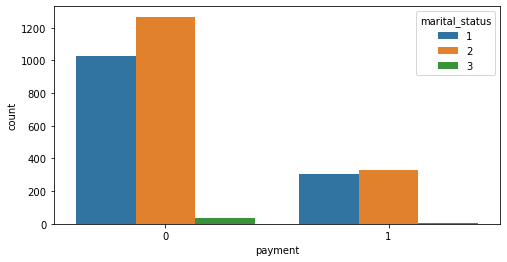

In [20]:
plt.figure(figsize=(8,4))
fig, axes = plt.subplots(figsize=(8,4))
sns.countplot(x = 'payment', hue = 'marital_status', data = data_clean)

`Marital status yang paling banyak di setiap kelas payment adalah single, sedangkan yang paling sedikit di kedua kelas adalah others` 

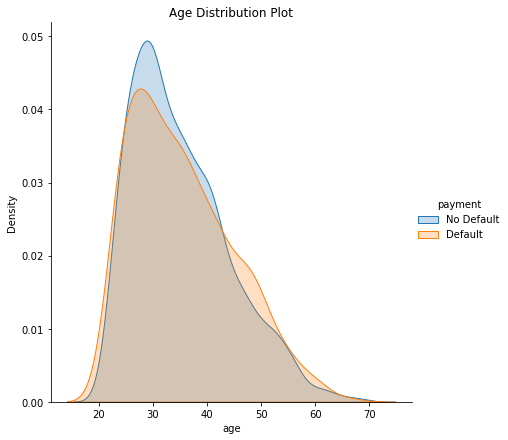

In [21]:
fg=sns.FacetGrid(data_clean, hue="payment", height=6,)
fg.map(sns.kdeplot, "age",shade=True).add_legend(labels=["No Default","Default"])
plt.title('Age Distribution Plot');
plt.show()

### Split

`Sebelum data displit, diambil terlebih dahulu 2 baris data acak untuk data inference`

In [22]:
df_inf = data_clean.sample(2, random_state=1)
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
1766,180000,2,1,1,38,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
525,200000,2,2,1,27,1,3,2,2,2,...,174547,181454,177141,5200,7000,0,13300,0,6200,1


`Selanjutnya, dipisahkan terlebih dahulu data frame yang ingin digunakan dengan data inferencenya. Agar tidak terjadinya kebocoran atau leaking pada data inference.` 

In [23]:
df = data_clean.drop(df_inf.index)
df

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
0,50000,1,3,3,50,0,0,0,-1,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
1,200000,2,3,3,45,-2,-2,-2,-2,-2,...,399,1396,0,2430,0,399,1396,0,0,0
2,130000,1,1,1,45,0,0,0,0,0,...,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
3,230000,1,2,1,41,0,0,0,0,0,...,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
4,50000,1,2,1,42,0,0,0,0,0,...,31320,36227,35569,2007,2000,1500,5400,0,3000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,320000,1,2,1,41,1,-2,-2,-2,-2,...,0,700,860,0,0,0,700,860,2420,1
2961,20000,1,1,1,39,-1,-1,-1,-1,-1,...,630,664,598,700,600,700,700,600,1400,0
2962,20000,1,2,2,25,0,0,0,0,0,...,16600,17025,17381,1300,1300,1300,700,630,650,0
2963,50000,1,2,2,38,0,0,0,0,0,...,17833,18246,18642,1300,1600,650,700,700,700,0


`Lalu, Data dibagi menjadi 2, x untuk feature dan y untuk target atau kolom payment. Setelah data x dan y yang sudah didefinisikan, maka selanjutnya data tersebut displit menjadi 2 yaitu data train sebanyak 80% dan data test sebanyak 20%`

In [24]:
X = df.drop('payment', axis=1)
y = df['payment']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,stratify=y, random_state=49)

In [25]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(2369, 23)
(593, 23)
(2369,)
(593,)


`Dilihat dari bentuk datanya, data yg sudah displit sudah mempunyai baris yang sama di data x train dan y train, begitu juga dengan x test dan y test.`

In [26]:
df_eda = pd.concat([X_train, y_train], axis=1)

df_eda.shape

(2369, 24)

`Lalu digabung data x train atau fitur dengan y train atau target untuk digunakan pelatihan model` 

### Exploratory Data Analysis (EDA) Modeling

`Selanjutnya mencari banyak unique value di masing masing kolom`

In [27]:
for i in df_eda.columns.tolist():
    print(f'num of unique label in {i}: ', len(df_eda[i].unique()))

num of unique label in limit_balance:  58
num of unique label in sex:  2
num of unique label in education_level:  4
num of unique label in marital_status:  3
num of unique label in age:  48
num of unique label in pay_1:  10
num of unique label in pay_2:  10
num of unique label in pay_3:  9
num of unique label in pay_4:  8
num of unique label in pay_5:  8
num of unique label in pay_6:  7
num of unique label in bill_amt_1:  2117
num of unique label in bill_amt_2:  2078
num of unique label in bill_amt_3:  2053
num of unique label in bill_amt_4:  2011
num of unique label in bill_amt_5:  1990
num of unique label in bill_amt_6:  1964
num of unique label in pay_amt_1:  1167
num of unique label in pay_amt_2:  1128
num of unique label in pay_amt_3:  1060
num of unique label in pay_amt_4:  993
num of unique label in pay_amt_5:  966
num of unique label in pay_amt_6:  958
num of unique label in payment:  2


`Dilihat dari jumlah unique value di masing masing kolomnya, yang mempunyai unique value dibawah atau sama dengan 10 merupakan kolom kategorikal sedangkan yang lebih dari 10 merupakan kolom numerikal.`

In [28]:
cat_col = ['sex','education_level','marital_status','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','payment']
num_col = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3'
            ,'pay_amt_4','pay_amt_5','pay_amt_6']

### Categorical Features

In [29]:
df_cat = df_eda[cat_col]
df_cat.head()

,sex,education_level,marital_status,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
2316,2,3,2,0,0,2,0,0,0,0
1212,1,3,2,1,2,2,2,0,0,1
51,1,2,1,0,0,0,0,0,-2,0
2273,2,2,1,3,3,3,2,0,0,1
650,2,2,1,-1,-1,0,0,-1,-1,0


`Selanjutnya mencari banyak unique value di masing masing kolom`

In [30]:
for i in df_cat.columns.tolist():
    print(i, '\n')
    print(df_cat[i].value_counts())
    print('-'*30)

sex 

2    1447
1     922
Name: sex, dtype: int64
------------------------------
education_level 

2    1113
1     828
3     390
4      38
Name: education_level, dtype: int64
------------------------------
marital_status 

2    1265
1    1072
3      32
Name: marital_status, dtype: int64
------------------------------
pay_1 

 0    1211
-1     427
 1     290
 2     206
-2     202
 3      27
 4       2
 7       2
 6       1
 8       1
Name: pay_1, dtype: int64
------------------------------
pay_2 

 0    1283
-1     459
 2     303
-2     290
 3      22
 4       4
 1       4
 6       2
 5       1
 7       1
Name: pay_2, dtype: int64
------------------------------
pay_3 

 0    1293
-1     461
-2     295
 2     293
 3      17
 7       3
 4       3
 5       3
 6       1
Name: pay_3, dtype: int64
------------------------------
pay_4 

 0    1338
-1     416
-2     329
 2     266
 3       7
 7       5
 4       5
 5       3
Name: pay_4, dtype: int64
------------------------------
pay_5 

 0    

`Setelah dipastikan tidak ada unique value yang misleading, selanjutnya mencari korelasi antara calon fitur kolom kategorikal dengan target`

#### Heatmap for categorical 

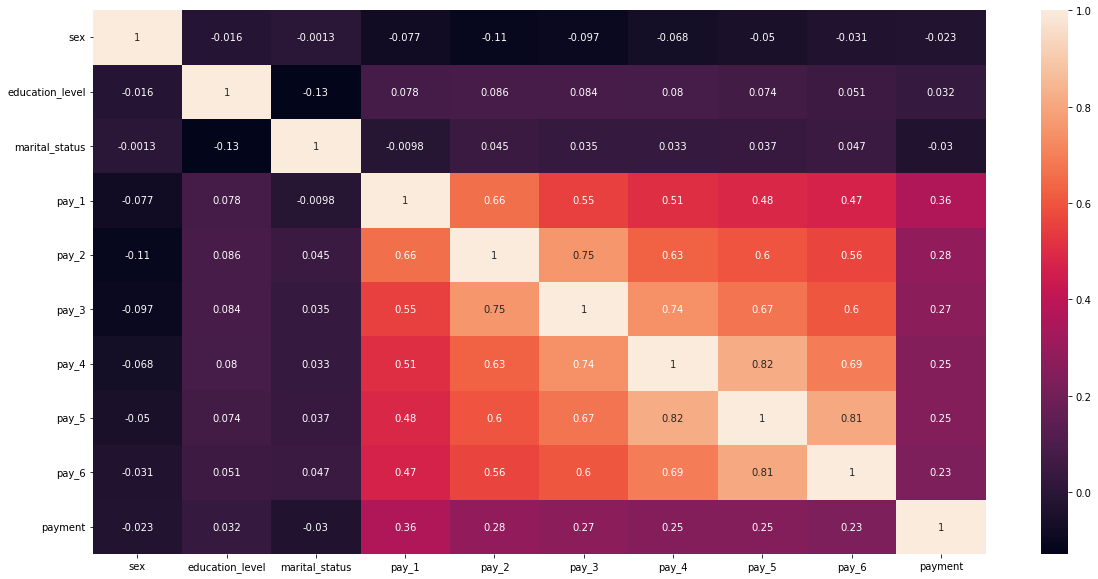

In [31]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_cat.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

`Pada fitur kolom kategorikal yang dipilih adalah pay_1,pay_2,pay_3,pay_4,pay_5,pay_6. Dikarenakan nilai korelasinya dengan target atau payment cukup tinggi dibanding yang lain yaitu masih diatas 0,1. Sehingga sisanya tidak dipakai menjadi fitur model`

`Setelah ditentukan fitur kolom kategorikal apa saja yang dipakai, selanjutnya memeriksa multikolinearitas antar kolom tersebut tinggi ataukah rendah, dikarenakan dilihat dari nama kolom dan unique hanya berbeda sedikit saja, sehingga perlu  dipastikan apakah antar kolom tersebut saling berhubungan atau tidak`

#### VIF

In [32]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
X = df_cat.iloc[:,3:9]
calc_vif(X)

,variables,VIF
0,pay_1,1.795104
1,pay_2,2.984567
2,pay_3,3.286886
3,pay_4,3.918208
4,pay_5,4.716277
5,pay_6,3.079438


`Dilihat dari nilai multikolinearitas antar kolom tersebut tidak tinggi atau tidak ada yg diatas 5, sehingga kolom tersebut dikatakan tidak saling berhubungan dan bisa dipakai sebagai fitur modeling`

In [34]:
cat_col_final = ['pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','payment']
df_eda[cat_col_final].head(3)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
2316,0,0,2,0,0,0,0
1212,1,2,2,2,0,0,1
51,0,0,0,0,0,-2,0


`Selanjutnya mencari fitur apa saja yang dipakai pada kolom numerikal`

### Numerical Features

In [35]:
df_eda[num_col].head()

,limit_balance,age,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2316,80000,54,16613,19828,19227,20593,20951,21460,3500,0,2000,1000,1000,1000
1212,30000,28,25554,28031,28345,27591,28218,29880,3204,1068,0,1068,2136,600
51,500000,40,30415,31645,32556,36642,-8,-8,2006,3000,5080,8,0,0
2273,30000,37,27672,28911,29163,28380,28636,30290,2000,1000,0,1000,2100,1500
650,240000,34,626,1921,20740,21274,888,360,1921,19000,2624,888,360,360


#### Outlier Handling

`Mencari masing masing distribusi data kolom numerikal`

In [36]:
def coba(a,c):
  skewness = a[c].skew()
  print('Nilai skew dari',c,':',skewness)

for x in df_eda[num_col]:
    coba(df_eda,x)

Nilai skew dari limit_balance : 1.0432325519562877
Nilai skew dari age : 0.7759826792267019
Nilai skew dari bill_amt_1 : 2.4190477314000987
Nilai skew dari bill_amt_2 : 2.412735091079112
Nilai skew dari bill_amt_3 : 2.4902199991729588
Nilai skew dari bill_amt_4 : 2.459689132408018
Nilai skew dari bill_amt_5 : 2.4100057526725576
Nilai skew dari bill_amt_6 : 2.4774231065233456
Nilai skew dari pay_amt_1 : 12.221617155431545
Nilai skew dari pay_amt_2 : 27.511245326069893
Nilai skew dari pay_amt_3 : 8.664248598413263
Nilai skew dari pay_amt_4 : 8.667800641107672
Nilai skew dari pay_amt_5 : 12.830889188469582
Nilai skew dari pay_amt_6 : 7.591178502400935


`Berikut untuk ilustrasi distribusi datanya`

Text(0.5, 1.0, 'Limit Balance Distribution Plot')

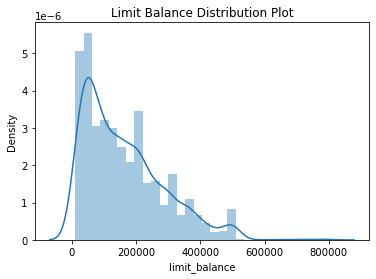

In [98]:
sns.distplot(df_eda['limit_balance'])
plt.title('Limit Balance Distribution Plot')

Text(0.5, 1.0, 'Limit Balance Box Plot')

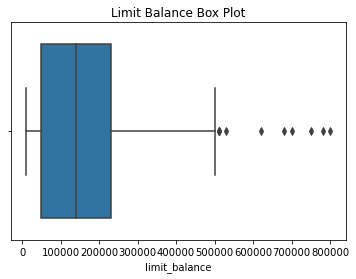

In [100]:
sns.boxplot(df_eda['limit_balance'])
plt.title('Limit Balance Box Plot')

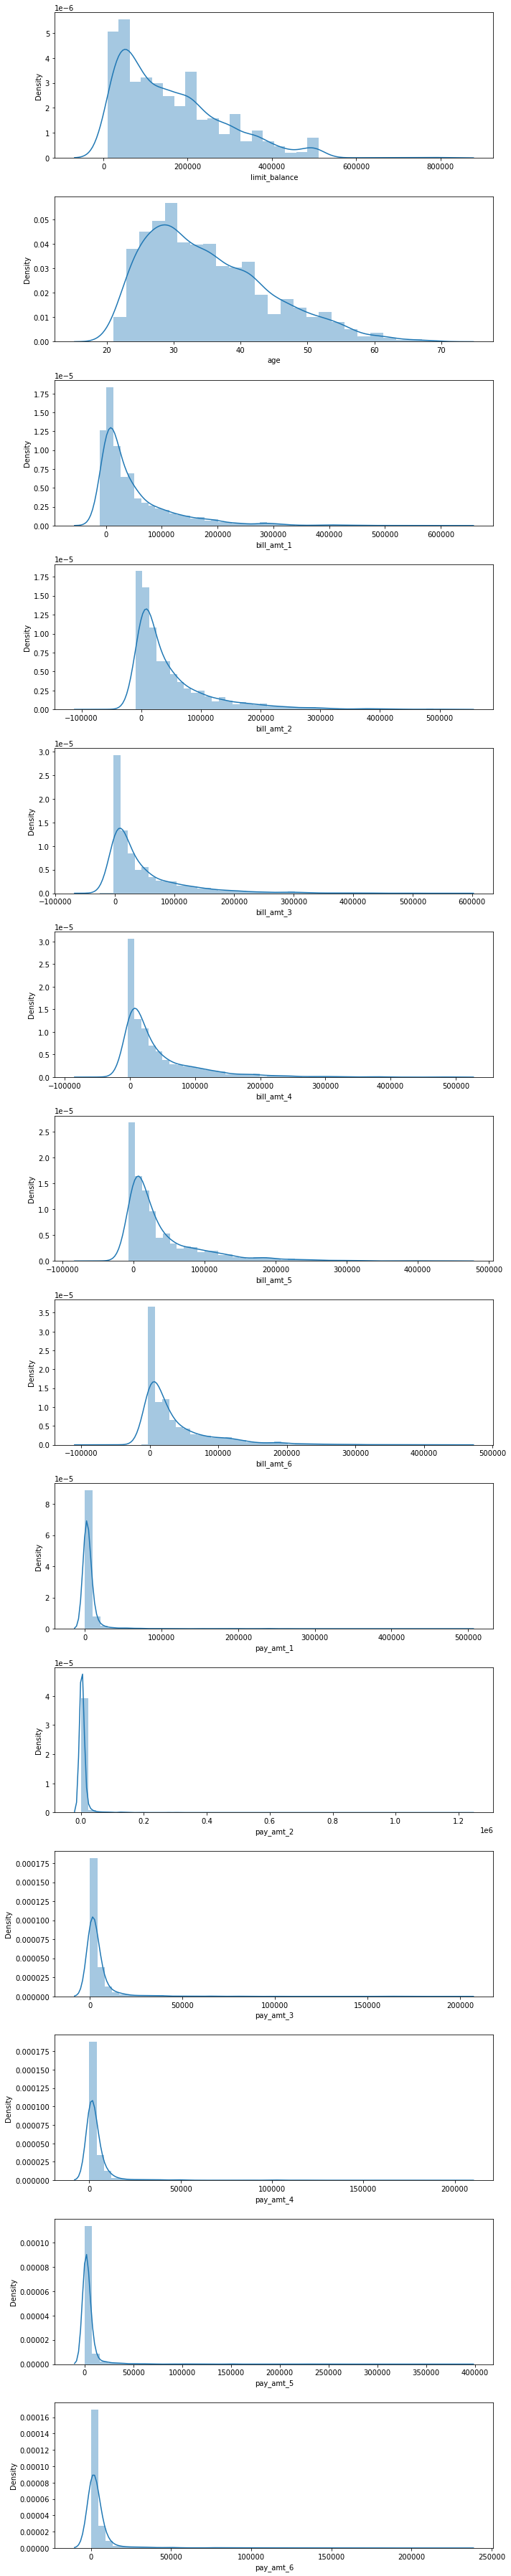

In [37]:
num_col = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3'
            ,'pay_amt_4','pay_amt_5','pay_amt_6']
fig, ax = plt.subplots(nrows=14, figsize=(10,50))
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.distplot(df_eda[col], ax=ax[i])
plt.tight_layout()

`Sedangakan berikut, mencari masing masing outliernya`

In [38]:
def outlier_analysis(data,col):
  skewness = data[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = data[col].mean() + 3*data[col].std()
    lower = data[col].mean() - 3*data[col].std()
  else:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + 1.5*IQR
    lower = Q3 - 1.5*IQR
  
  no_outliers = data[(data[col]>=lower) & (data[col]<=upper)]
  outliers = data[(data[col]<lower) | (data[col]>upper)]
  print('percentage outlier from',i,':',len(outliers)/df.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(df_eda[num_col].columns):
  outlier_analysis(df_eda[num_col],i)

percentage outlier from limit_balance : 8.980418636056719 %
percentage outlier from age : 9.149223497636733 %
percentage outlier from bill_amt_1 : 13.166779203241052 %
percentage outlier from bill_amt_2 : 12.89669142471303 %
percentage outlier from bill_amt_3 : 13.639432815665092 %
percentage outlier from bill_amt_4 : 13.808237677245106 %
percentage outlier from bill_amt_5 : 14.449696151249155 %
percentage outlier from bill_amt_6 : 14.145847400405131 %
percentage outlier from pay_amt_1 : 13.977042538825119 %
percentage outlier from pay_amt_2 : 13.943281566509116 %
percentage outlier from pay_amt_3 : 12.491559756921 %
percentage outlier from pay_amt_4 : 12.491559756921 %
percentage outlier from pay_amt_5 : 12.35651586765699 %
percentage outlier from pay_amt_6 : 12.930452397029036 %


`Berikut merupakan visualisasi boxplot outliernya`

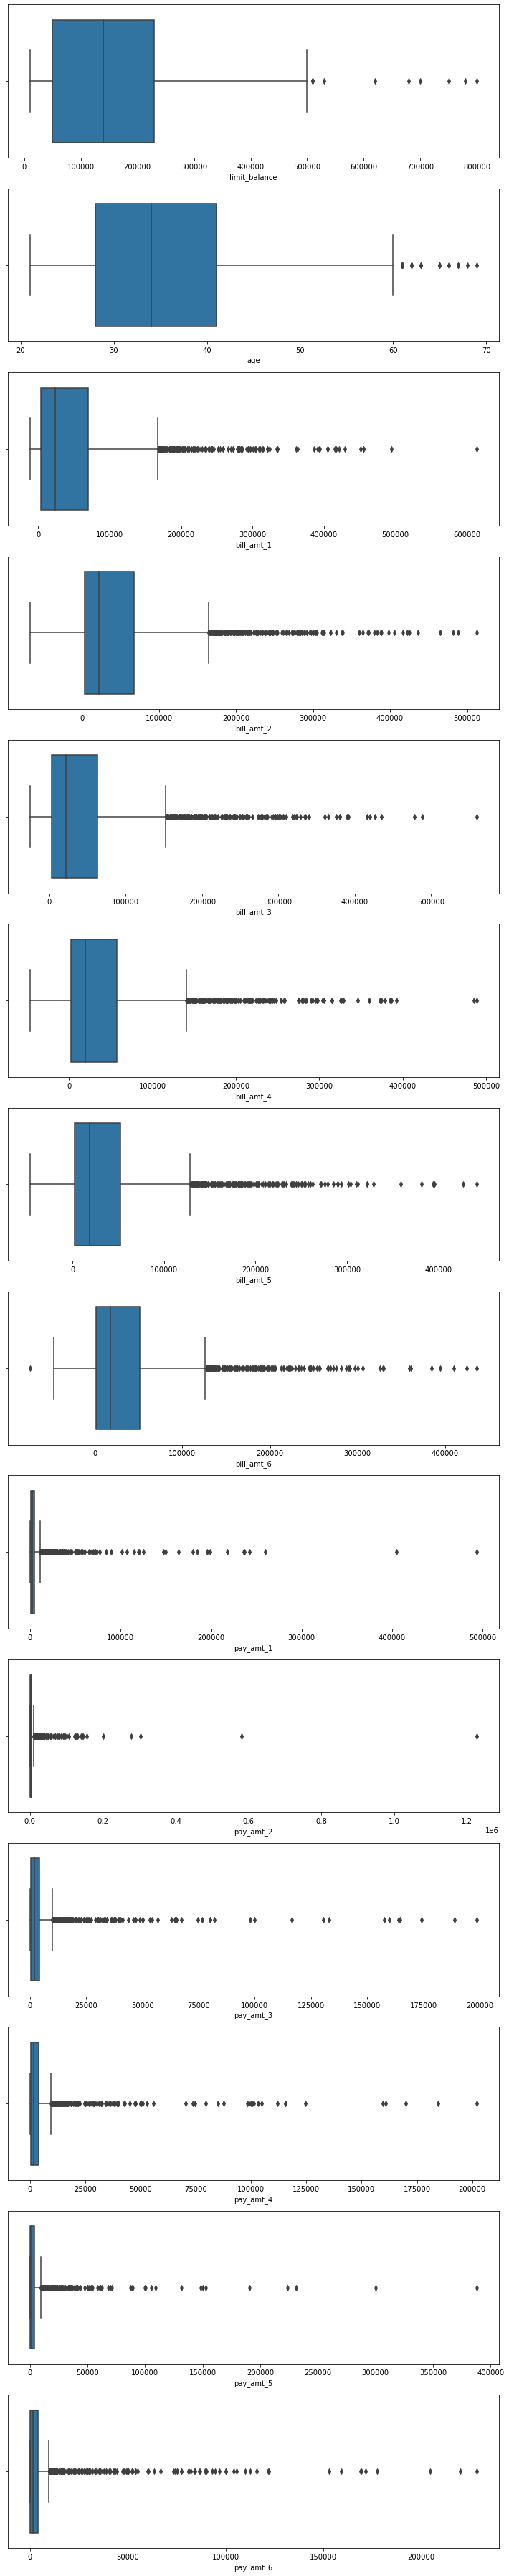

In [39]:
num_col = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3'
            ,'pay_amt_4','pay_amt_5','pay_amt_6']
fig, ax = plt.subplots(nrows=14, figsize=(10,50))
ax = ax.flatten()
for i, col in enumerate(num_col):
    sns.boxplot(df_eda[col], ax=ax[i])
plt.tight_layout()



`Dilihat dari distribusi dan outliernya untuk kolom limit balance dan age mempunyai distsibusi sedikit tidak normal atau skew kanan. Tetapi untuk kolom bill amt dan pay amt mempunyai distribusi yang sangat tidak normal, Diasumsikan karena pada kolom bill amt atau total tagihan dan pay amt atau total yang dibayar masing masing pasti mempunyai perbedaan di setiap orangnya. Sehingga wajar saja pada kolom tersebut mempunyai outlier yang sangat banyak dan juga didukung dengan jumlah outliernya diatas 10% sehingga tidak perlu dihandle outliernya. Tetapi untuk limit balance dan age mempunyai outlier masih dibawah 10% sehingga bisa dilakukan handling outlier sesuai dengan distribusi datanya yang sudah ditampilkan sebelumnya. Tetapi untuk kolom age, umur tidak mungkin dilakukan capping outlier atau diganti umur masing masing orang sehingga yang perlu dihandle outliernya hanyalah kolom limit balance saja.`

In [40]:
wins_norm = Winsorizer(capping_method='iqr', tail='right', fold=1.5, variables=['limit_balance'])

df_eda_cleaned = wins_norm.fit_transform(df_eda)

In [41]:
norm = ['limit_balance']

In [42]:
print('before handling: \n', df_eda[norm].describe())

before handling: 
        limit_balance
count    2369.000000
mean   161806.669481
std    123980.074574
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    230000.000000
max    800000.000000


In [43]:
print('after handling: \n', df_eda_cleaned[norm].describe())

after handling: 
        limit_balance
count    2369.000000
mean   161219.924019
std    121815.473023
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    230000.000000
max    500000.000000


`Setalah di handle, terdepat perbedaan sedikit pada nilai mean dan max pada kedua kolom tersebut` 

#### Heatmap for numerikal

`Selanjutnya mencari korelasi antara kolom numerikal dengan target`

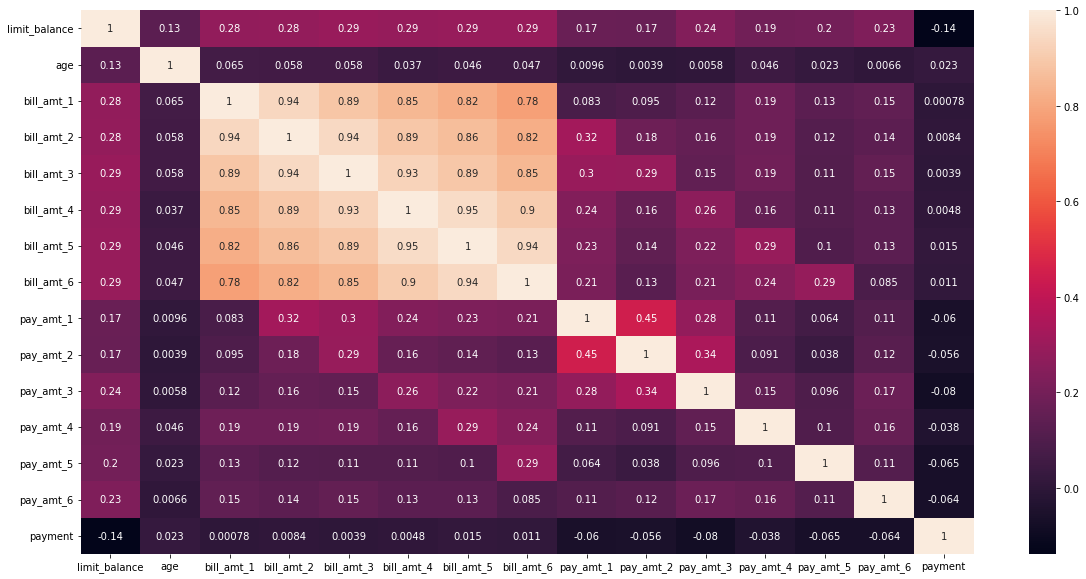

In [44]:
num_col = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3'
            ,'pay_amt_4','pay_amt_5','pay_amt_6','payment']
fig,ax = plt.subplots(figsize=[20,10])
corr = df_eda_cleaned[num_col].corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

`Pada fitur kolom numerikal yang dipilih adalah limit_balance saja. Dikarenakan nilai korelasinya dengan target atau payment cukup baik dibanding yang lain yaitu masih diatas 0,1 walaupun minus yang berarti terbalik hubungannya dengan target, kolom lomit balance masih cukup baik untuk digunakan sebagai kolom fitur modeling. Sehingga sisanya tidak dipakai menjadi fitur model`

In [45]:
num_col_final = ['limit_balance']

In [46]:
final = num_col_final + cat_col_final

In [47]:
df_eda_cleaned = df_eda_cleaned[final]
df_eda_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
2316,80000.0,0,0,2,0,0,0,0
1212,30000.0,1,2,2,2,0,0,1
51,500000.0,0,0,0,0,0,-2,0
2273,30000.0,3,3,3,2,0,0,1
650,240000.0,-1,-1,0,0,-1,-1,0
...,...,...,...,...,...,...,...,...
1407,150000.0,-1,-1,-1,-1,-1,-1,0
483,320000.0,-2,-2,-2,-2,-2,-2,0
1128,230000.0,0,0,0,0,-1,-1,0
71,210000.0,0,0,0,0,0,0,0


#### Scaling

`Setelah ditentukan fitur fitur apa saja yang dipakai, maka selanjutnya melakukan scaling`

In [48]:
df_eda_cleaned['limit_balance'].skew()

0.908388299573981

In [49]:
num_col_final = ['limit_balance']
scaler = MinMaxScaler()

df_eda_cleaned[num_col_final] = scaler.fit_transform(df_eda_cleaned[num_col_final])
df_eda_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
2316,0.142857,0,0,2,0,0,0,0
1212,0.040816,1,2,2,2,0,0,1
51,1.000000,0,0,0,0,0,-2,0
2273,0.040816,3,3,3,2,0,0,1
650,0.469388,-1,-1,0,0,-1,-1,0
...,...,...,...,...,...,...,...,...
1407,0.285714,-1,-1,-1,-1,-1,-1,0
483,0.632653,-2,-2,-2,-2,-2,-2,0
1128,0.448980,0,0,0,0,-1,-1,0
71,0.408163,0,0,0,0,0,0,0


`Scaling pada kolom limit balance menggunakan MinMax scaler dikarenakan kolom tersebut mempunyai distribusi data tidak normal atau skew`

## v. Data Preprocessing

`Selanjutnya untuk data testing juga dilakukan feature enginering yang sama dengan training seperti handle outlier dan juga scaling`

In [50]:
testing = pd.concat([X_test, y_test], axis=1)
testing.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
1481,100000,1,2,2,29,-1,-1,-1,0,-1,...,6150,10122,2689,2005,6633,18,10152,2697,3607,0
1885,90000,2,1,2,25,2,0,0,0,0,...,18889,-783,73568,4000,3258,1000,0,77500,0,0
492,500000,2,1,1,38,-2,-2,-2,-2,-2,...,6972,11879,15574,9782,9350,6972,11879,15574,12921,0
2614,180000,1,2,1,33,0,0,0,0,0,...,34337,33524,35223,3006,3007,3002,3000,3000,2003,0
1916,80000,1,3,2,27,0,0,2,2,2,...,62756,61149,62464,50000,4000,2200,0,2300,5108,0


### Outlier Handling

In [51]:
testing_cleaned = wins_norm.transform(testing)
testing_cleaned.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
1481,100000.0,1,2,2,29,-1,-1,-1,0,-1,...,6150,10122,2689,2005,6633,18,10152,2697,3607,0
1885,90000.0,2,1,2,25,2,0,0,0,0,...,18889,-783,73568,4000,3258,1000,0,77500,0,0
492,500000.0,2,1,1,38,-2,-2,-2,-2,-2,...,6972,11879,15574,9782,9350,6972,11879,15574,12921,0
2614,180000.0,1,2,1,33,0,0,0,0,0,...,34337,33524,35223,3006,3007,3002,3000,3000,2003,0
1916,80000.0,1,3,2,27,0,0,2,2,2,...,62756,61149,62464,50000,4000,2200,0,2300,5108,0


In [52]:
testing_cleaned = testing_cleaned[final]
testing_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
1481,100000.0,-1,-1,-1,0,-1,-1,0
1885,90000.0,2,0,0,0,0,-1,0
492,500000.0,-2,-2,-2,-2,-2,-2,0
2614,180000.0,0,0,0,0,0,0,0
1916,80000.0,0,0,2,2,2,0,0
...,...,...,...,...,...,...,...,...
2097,30000.0,4,3,4,4,4,3,1
353,230000.0,0,0,0,-1,-1,-1,0
46,50000.0,0,0,0,0,0,0,0
653,80000.0,-1,-1,-1,-1,-1,-1,0


### Scaling

In [53]:
testing_cleaned[num_col_final] = scaler.transform(testing_cleaned[num_col_final])
testing_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
1481,0.183673,-1,-1,-1,0,-1,-1,0
1885,0.163265,2,0,0,0,0,-1,0
492,1.000000,-2,-2,-2,-2,-2,-2,0
2614,0.346939,0,0,0,0,0,0,0
1916,0.142857,0,0,2,2,2,0,0
...,...,...,...,...,...,...,...,...
2097,0.040816,4,3,4,4,4,3,1
353,0.448980,0,0,0,-1,-1,-1,0
46,0.081633,0,0,0,0,0,0,0
653,0.142857,-1,-1,-1,-1,-1,-1,0


`Setelah semua data testing dilakukan yang sama seperti training, maka data testing sudah siap sebagai bahan evaluasi untuk model yang sudah dilatih`

In [54]:
X_train = df_eda_cleaned.drop('payment',axis=1).copy()
y_train = df_eda_cleaned['payment']

X_test = testing_cleaned.drop('payment',axis=1).copy()
y_test = testing_cleaned['payment']

### Cross Validation

`Selanjutnya mencari nilai accuracy mean dan standar deviasi pada setiap model menggunakan cross validation`

In [55]:
log_model = LogisticRegression()
log_cv = cross_val_score(log_model, 
                         X_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('Accuracy- All - Cross Validation  : ', log_cv)
print('Accuracy- Mean - Cross Validation : ', log_cv.mean())
print('Accuracy- Std - Cross Validation  : ', log_cv.std())

Accuracy- All - Cross Validation  :  [0.83544304 0.8278481  0.83396705]
Accuracy- Mean - Cross Validation :  0.8324193953784366
Accuracy- Std - Cross Validation  :  0.0032880779405791557


In [56]:
svc_model = SVC()
svc_cv = cross_val_score(svc_model, 
                         X_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('Accuracy - All - Cross Validation  : ', svc_cv)
print('Accuracy - Mean - Cross Validation : ', svc_cv.mean())
print('Accuracy - Std - Cross Validation  : ', svc_cv.std())

Accuracy - All - Cross Validation  :  [0.83544304 0.82151899 0.84917617]
Accuracy - Mean - Cross Validation :  0.8353793992288482
Accuracy - Std - Cross Validation  :  0.01129108817726358


In [57]:
dt_model = DecisionTreeClassifier()
dt_cv = cross_val_score(dt_model, 
                         X_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('Accuracy - All - Cross Validation  : ', dt_cv)
print('Accuracy - Mean - Cross Validation : ', dt_cv.mean())
print('Accuracy - Std - Cross Validation  : ', dt_cv.std())

Accuracy - All - Cross Validation  :  [0.81392405 0.78987342 0.78200253]
Accuracy - Mean - Cross Validation :  0.7952666677362256
Accuracy - Std - Cross Validation  :  0.013578442514828334


In [58]:
rf_model = RandomForestClassifier()
rf_cv = cross_val_score(rf_model, 
                         X_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('Accuracy - All - Cross Validation  : ', rf_cv)
print('Accuracy - Mean - Cross Validation : ', rf_cv.mean())
print('Accuracy - Std - Cross Validation  : ', rf_cv.std())

Accuracy - All - Cross Validation  :  [0.80886076 0.80506329 0.80735108]
Accuracy - Mean - Cross Validation :  0.8070917093153219
Accuracy - Std - Cross Validation  :  0.0015611203870748178


In [59]:
knn_model = KNeighborsClassifier()
knn_cv = cross_val_score(knn_model, 
                         X_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('Accuracy - All - Cross Validation  : ', knn_cv)
print('Accuracy - Mean - Cross Validation : ', knn_cv.mean())
print('Accuracy - Std - Cross Validation  : ', knn_cv.std())

Accuracy - All - Cross Validation  :  [0.83544304 0.81012658 0.82129278]
Accuracy - Mean - Cross Validation :  0.8222874653061879
Accuracy - Std - Cross Validation  :  0.010359304605540727


In [60]:
nb_model = GaussianNB()
nb_cv = cross_val_score(nb_model, 
                         X_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('Accuracy - All - Cross Validation  : ', nb_cv)
print('Accuracy - Mean - Cross Validation : ', nb_cv.mean())
print('Accuracy - Std - Cross Validation  : ', nb_cv.std())

Accuracy - All - Cross Validation  :  [0.81265823 0.8        0.81368821]
Accuracy - Mean - Cross Validation :  0.808782146925286
Accuracy - Std - Cross Validation  :  0.006224135590803487


In [61]:
ab_model = AdaBoostClassifier()
ab_cv = cross_val_score(ab_model, 
                         X_train, 
                         y_train, 
                         cv=3, 
                         scoring='accuracy')

print('Accuracy - All - Cross Validation  : ', ab_cv)
print('Accuracy - Mean - Cross Validation : ', ab_cv.mean())
print('Accuracy - Std - Cross Validation  : ', ab_cv.std())

Accuracy - All - Cross Validation  :  [0.83037975 0.83797468 0.83396705]
Accuracy - Mean - Cross Validation :  0.8341071590915168
Accuracy - Std - Cross Validation  :  0.0031022023868698184


In [62]:
print("="*10,"Logistic Regresion","="*10)
print('Accuracy - Mean - Cross Validation : ', log_cv.mean())
print('Accuracy - Std - Cross Validation  : ', log_cv.std())

print("="*10,"SVC","="*10)
print('Accuracy - Mean - Cross Validation : ', svc_cv.mean())
print('Accuracy - Std - Cross Validation  : ', svc_cv.std())

print("="*10,"Decision Tree","="*10)
print('Accuracy - Mean - Cross Validation : ', dt_cv.mean())
print('Accuracy - Std - Cross Validation  : ', dt_cv.std())

print("="*10,"Random Forest","="*10)
print('Accuracy - Mean - Cross Validation : ', rf_cv.mean())
print('Accuracy - Std - Cross Validation  : ', rf_cv.std())

print("="*10,"KNN","="*10)
print('Accuracy - Mean - Cross Validation : ', knn_cv.mean())
print('Accuracy - Std - Cross Validation  : ', knn_cv.std())

print("="*10,"Naive Bayes","="*10)
print('Accuracy - Mean - Cross Validation : ', nb_cv.mean())
print('Accuracy - Std - Cross Validation  : ', nb_cv.std())

print("="*10,"AdaBoost","="*10)
print('Accuracy - Mean - Cross Validation : ', ab_cv.mean())
print('Accuracy - Std - Cross Validation  : ', ab_cv.std())



========== Logistic Regresion ==========
Accuracy - Mean - Cross Validation :  0.8324193953784366
Accuracy - Std - Cross Validation  :  0.0032880779405791557
========== SVC ==========
Accuracy - Mean - Cross Validation :  0.8353793992288482
Accuracy - Std - Cross Validation  :  0.01129108817726358
========== Decision Tree ==========
Accuracy - Mean - Cross Validation :  0.7952666677362256
Accuracy - Std - Cross Validation  :  0.013578442514828334
========== Random Forest ==========
Accuracy - Mean - Cross Validation :  0.8070917093153219
Accuracy - Std - Cross Validation  :  0.0015611203870748178
========== KNN ==========
Accuracy - Mean - Cross Validation :  0.8222874653061879
Accuracy - Std - Cross Validation  :  0.010359304605540727
========== Naive Bayes ==========
Accuracy - Mean - Cross Validation :  0.808782146925286
Accuracy - Std - Cross Validation  :  0.006224135590803487
========== AdaBoost ==========
Accuracy - Mean - Cross Validation :  0.8341071590915168
Accuracy - Std - 

`Berdasarkan hasil mean dan standar deviasi accuracynya dari cross validation di setiap modelnya, model yang terbaik adalah AdaBoost dengan nilai mean accuracynya 0,8341 dan standar deviasinya 0,0031. Pada model AdaBoost paling konsisten dibanding model lainnya dilihat dari nilai standar deviasinya. Tetapi untuk mean accuracynya yang paling tinggi adalah SVC yaitu 0,8353 hanya selisih 0,001 dengan AdaBoost. Tetapi model SVC mempunyai nilai standar deviasi 0,0112 yang dikatakan tidak lebih konsisten dari model AdaBoost. Sehingga model AdaBoost menjadi model terbaik dengan hyperparameter default`

## vi. Model Definition & Training

`Selanjutnya mencari hyperparameter pada model AdaBoost menggunakan GridSearchCV`

### Hyper-param Tuning

In [63]:
params = [
    {'n_estimators': [100,150,200,300],    #4                                       
     'learning_rate': [0.01,0.1,1],        #4    
     'random_state':[1,10,100],            #3
     'algorithm':['SAMME', 'SAMME.R'] }    #2   4*4*3*2=96 kombinasi      
  ]

grid_search = GridSearchCV(ab_model, params, cv=3,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.01, 0.1, 1],
                          'n_estimators': [100, 150, 200, 300],
                          'random_state': [1, 10, 100]}],
             return_train_score=True, scoring='accuracy')

In [64]:
pd.DataFrame(grid_search.cv_results_).shape

(72, 20)

In [65]:
grid_search.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 0.1,
 'n_estimators': 100,
 'random_state': 10}

In [66]:
grid_search.best_score_

0.8433941377484718

`Setalah melakukan hyperparameter tuning, didapatkan hyperparameter terbaik pada model AdaBoost yaitu menggunakan algorithm SAMME.R, lalu learning rate sebesar 0.1, n estimator sebanyak 100 dan random statenya 10. Dari hyperparameter tersebut didapat hasil terbaiknya yaitu 0,8433 sedikit lebih baik dibanding denga paramter default saja. Sehingga selanjutnya model yang dipakai adalah AdaBoost dengan Hyperparamet yang telah di tuning sebelumnya`

In [67]:
ab_model_final = grid_search.best_estimator_

## vii. Model Evaluation

`Setelah didapatkan model dan hyperparameter yang digunakan, selanjutnya dievaluasi model tersebut menggunakan hasil prediksi pada training dan testing`

In [68]:
y_pred_train = ab_model_final.predict(X_train)
y_pred_test = ab_model_final.predict(X_test)

print("="*10,"TRAINING","="*10)
print(classification_report(y_train,y_pred_train))
print("="*10,"TEST","="*10)
print(classification_report(y_test,y_pred_test))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1862
           1       0.75      0.40      0.53       507

    accuracy                           0.84      2369
   macro avg       0.80      0.68      0.72      2369
weighted avg       0.83      0.84      0.83      2369

========== TEST ==========
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       466
           1       0.61      0.37      0.46       127

    accuracy                           0.81       593
   macro avg       0.73      0.65      0.67       593
weighted avg       0.79      0.81      0.80       593



`Berikut hasil confusion matrixnya`

Text(0.5, 1.0, 'Counfusion Matrix Training')

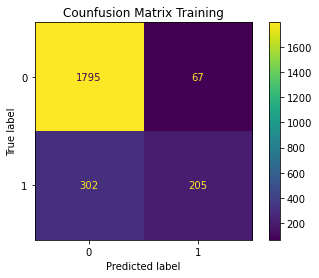

In [93]:
cm_p = confusion_matrix(y_train, y_pred_train, labels=ab_model_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_p,display_labels=ab_model_final.classes_)
disp.plot()
plt.title('Counfusion Matrix Training')

Text(0.5, 1.0, 'Counfusion Matrix Testing')

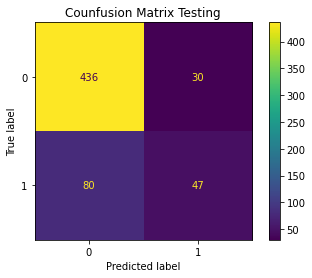

In [94]:
cm = confusion_matrix(y_test, y_pred_test, labels=ab_model_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ab_model_final.classes_)
disp.plot()
plt.title('Counfusion Matrix Testing')

`Hasil evaluasi yang didapat adalah`
- Kelas default atau 1 mempunyai distribusi lebih sedikit dibanding kelas 0 atau tidak default. Sehingga data tersebut dikatakan imbalance dengan fokus atau positifnya pada kelas 1 dikarenakan kelas tersebut minoritas.
- Dilihat dari point of view pihak bank, urgensi data akan berakibat fatal jika hasil prediksi model adalah memprediksi orang tersebut tidak default atau bayar tepat waktu sedangkan pada kenyataan datanya orang tersebut telat atau menunggak pembayaran tagihan kreditnya. Jika terjadi prediksi tersebut, itu akan sangat merugikan pihak bank. Sehingga sangat dihindari kesalahan prediksi seperti tersebut dengan memerhatikan nilai recall kelas default pada classification report agar mendekati 1
- Berdasarkan penjelasan diatas, model dievaluasi berdasarkan nilai recall di kelas default atau 1
- Hasil dari evaluasi model terbilang tidak cukup bagus untuk urgensi yang telah disebutkan sebelumnya. Dikarenakan nilai recall kelas defaultnya masih dibawah 0.5
- Model AdaBoost mempunyai bentuk overfit, dikarenakan recall pada data training mempunyai nilai 0.40 sedangkan nilai recall pada data testing adalah 0.37
- Pada confusion matrix diatas, presentase model lebih banyak menebak kelas tidak default atau 0 dengan benar dibandingkan model menebak kelas default atau 1 dengan benar 

## viii. Model Inference 

`Selanjutnya menggunakan data inference untuk membuktikan model tersebut sudah bisa diimplementasikan ke data aslinya atau belum`

In [70]:
df_inf

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
1766,180000,2,1,1,38,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
525,200000,2,2,1,27,1,3,2,2,2,...,174547,181454,177141,5200,7000,0,13300,0,6200,1


`sebelum dilakukan prediksi data inference menggunakan model yang sudah dibuat, data inference tersebut dilakukan feature enginering yang sama persis dengan testing`

### Outlier Handling

In [71]:
inf_cleaned = wins_norm.transform(df_inf)
inf_cleaned.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,payment
1766,180000,2,1,1,38,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
525,200000,2,2,1,27,1,3,2,2,2,...,174547,181454,177141,5200,7000,0,13300,0,6200,1


In [72]:
inf_cleaned = inf_cleaned[final]
inf_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
1766,180000,-2,-2,-2,-2,-2,-2,0
525,200000,1,3,2,2,2,2,1


### Scaling

In [73]:
inf_cleaned[num_col_final] = scaler.transform(inf_cleaned[num_col_final])
inf_cleaned

,limit_balance,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,payment
1766,0.346939,-2,-2,-2,-2,-2,-2,0
525,0.387755,1,3,2,2,2,2,1


In [74]:
inf_cleaned.shape

(2, 8)

`Setelah dilakukan outlier handling dan scaling yang sama persis dengan testing, maka data inference siap dilakukan prediksi kelas payment di model yang sudah dibuat`

In [75]:
X_inf = inf_cleaned.drop('payment',axis=1).copy()

In [76]:
y_pred_inf = ab_model_final.predict(X_inf)
y_pred_inf

array([0, 1], dtype=int64)

`Dari hasilnya, model sudah berhasil memprediksi pada data inference sehingga dapat dikatakan model sudah boleh diimplementasikan pada data real dan juga jika dilihat dari hasil prediksinya, model berhasil menebak seluruhnya dengan benar kelas tidak default maupun kelas default`

## ix. kesimpulan 

`Berdasarkan analisis dan overview yang didapat:`

- Pada data credit card tidak mempunyai missing value tetapi terdapat 1 duplicate data saja
- Pada kolom educatin level mempunyai unique value yang missleading seperti 0,5, dan 6. Sehingga ketiga unique value tersebut digabung menjadi unique 4 saja yang berari others. 
- Begitupun juga dengan kolom marital status mempunyai unique value yang missleading yaitu 0. sehingga unique value tersebut digabungkan dengan unique value 3 yang berarti others.
- Pada kolom pay_0 mempunyai nama yang missleading sehingga perlu diganti menjadi pay_1 agar sama urutannya seperti kolom bill_amt dan pay_amt sesuai dengan bulannya
- Pada nama kolom default_payment_next_month atau target diubah menjadi payment agar mudah pembacaannya.
- Pada target datanya mempunyai kelas yang tidak seimbang atau datanya bersifat imbalanced. Kelas tidak default sebanyak 2329 sedangkan kelas default sebanyak 635
- Fitur yang digunakan untuk modeling adalah limit_balance, pay_1, pay_2, pay_3, pay_4, pay_5, dan pay_6. Dikarenakan ketujuh fitur tersebut mempunyai nilai korelasi dengan target yang cukup tinggi yaitu diatas 0,1 dibanding fitur fitur yang lain masih dibawah 0,1.
- Model yang digunakan  
- Dari hasil cross validation, 7 model yang di validasi yaitu logistic regresion, SVC, Decision Tree, Random Forest, KNN, Naive Bayes, dan Adaboost didapatkan hasil rata rata accuracy dan standar deviasi di setiap modelnya. Dari ketujuh model menggunakan parameter yang sama yaitu default. Untuk rata rata accuracy tertinggi jatuh kepada model SVC yaitu 0.853 sedangkan untuk nilai standar deviasi terkecil atau model yang paling konsisten adalah AdaBoost dengan standar deviasinya 0.0031. Ditinjau dari kedua model tersebut yang terbaik adalah model AdaBoost. Dikarenakan model AdaBoost mempunyai nilai yang paling konsisten dan juga rata rata accuracynya tidak terlalu jaug dengan model SVC yaitu dengan rata rata accuracynya 0,8341 yang dimana hanya selisih 0.001 saja dengan SVC.
- Hyperparameter tuning dilakukan dengan GridSearchCV pada model terbaik yaitu AdaBoost. Didapat score accuracy terbaik yaitu 0.8433 dengan hyper parameternya algorithm SAMME.R, lalu learning rate sebesar 0.1, n estimator sebanyak 100 dan random statenya 10. Selisih model AdaBoost dengan hyperparameter default dan yang sudah dituning hanya selisih sedikit yaitu 0.01 saja. Yang dimana model AdaBoost dengan hyperparameter yang telah dituning lebih bagus dibanding model AdaBoost hyperparameter default. Sehingga model yang menggunakan hyperparamter yang telah dituning akan digunakan sebagai model dan dilakukan evaluasi menggunakan data train dan test
- Dilihat dari point of view pihak bank, urgensi data akan berakibat fatal jika hasil prediksi model adalah memprediksi orang tersebut tidak default atau bayar tepat waktu sedangkan pada kenyataan datanya orang tersebut telat atau menunggak pembayaran tagihan kreditnya. Jika terjadi prediksi tersebut, itu akan sangat merugikan pihak bank. Sehingga sangat dihindari kesalahan prediksi seperti tersebut dengan memerhatikan nilai recall kelas default pada classification report agar mendekati 1
- Model AdaBoost mempunyai bentuk overfit, dikarenakan recall pada data training mempunyai nilai 0.40 sedangkan nilai recall pada data testing adalah 0.37
- Hasil dari evaluasi model terbilang tidak cukup bagus untuk urgensi yang telah disebutkan sebelumnya. Dikarenakan nilai recall kelas defaultnya masih dibawah 0.5. Sehingga dari pihak bank akan mengalami kerugian akibat salah prediksi dikarenakan bank akan banyak memberi pinjaman kepada orang yang tidak bisa membayar tagihan pinjamannya.

# Conceptual Problems

1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
- Criterion pada parameter decision tree berfungsi sebagai metode saat melakukan operasi pemisahan. Dikarenakan decision tree mempunyai konsep partisi, sehingga paramter criterion sangat penting dalam menentukan bagaimana cara membaginya. Salah satu contoh criterion adalah Gini. Gini mempunyai nilai antara 0 hingga 0,5. Jika gini bernilai 0 maka menandakan tidak ada pembagian selanjutnya atau bisa dikatakan sudah menjadi leaf. Daya komputasi gini terhitung lebih cepat dibandingkan dengan metode yang lain seperti entropi, dikarenakan pada mekanisme penghitungan medote gini tersebut tidak menghitung fungsi log.

2. Apakah fungsi dari pruning pada Tree model?
- Pada decision tree cenderung overfitting saat modeling. Dikarenakan decision tree akan selalu overfit pada data training jika kita membiarkannya mencapai max depthnya atau maksimal kedalamannya. Oleh karena itu, kita membutuhkan pruning untuk mengurangi terjadinya overfiting dengan menyederhanakan decision tree dengan cara menghapus aturan terlemah atau the weekest rules. Pruning menghentikan tree sebelum selesai mengklasifikasikan set training dan pruning memungkinkan tree untuk mengklasifikasikan set training dengan sempurna yang dilanjutkan dengan memangkas tree tersebut agar tidak terjadinya overfitting

3. Bagaimana cara memilih K yang optimal pada KNN?
- Pada algoritma K-Nearest Neighbor dapat memprediksi kategori titik uji dari label kelas uji yang tersedia dengan mencari jarak antara titik uji dan nilai fitur K Terdekat yang dilatih. Langkah `pertama` yang dilakukan adalah menentukan nilai K terlebih dahulu berdasarkan asumsi pribadi, biasanya jika kelas berjumlah genap maka sebaiknya nilai K-nya ganjil begitupun sebaliknya, jika kelas berjumlah ganjil maka sebaiknya nilai K-nya genap. Langkah `kedua` adalah berhati hati dalam menentukan nilai K yang sangat kecil agar tidak terjadinya unstable decision boundaries. Lanngkah `ketiga` yaitu mencari nilai K yang substansial untuk klasifikasi karena mengarah pada smoothening the decision boundaries. Langkah `Keempat` yaitu membuat plot antara tingkat kesalahan atau nilai error dalam menggunakan K yang kita ingin gunakan. Lalu pilih nilai K yang memiliki tingkat kesalahan atau error yang paling kecil  

4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
- cross validation berfungsi untuk mengevaluasi model machine learning tertentu dengan melatih beberapa model tersebut pada data training yang tersedia dan mengevaluasinya hasilnya. Dengan menggunakan cross validation, ada kemungkinan besar dapat mendeteksi overfit dengan mudah. Untuk melakukan cross validation, kita harus membuat jumlah lipatan (partisi) data yang tetap atau cv diparameternya dan kemudian melakukan analisis pada setiap lipatan ata cv tersebut. Lalu menghitung rata-rata estimasi kesalahan keseluruhan dan juga nilai standar deviasi sebagai tolak ukur kekonsistenan model tersebut.

5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!
- `Accuracy`
Merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data. Accuracy bisa digunakan ketika kondisi data yang seimbang antar target kelasnya. 
> Accuracy = (TP + TN) /(TP + TN + FP + FN)
- `Precission`
Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Precision biasa digunakan ketika kondisi data tidak seimbang atau imbalance pada kelas targetnya.
> Precision = (TP) / (TP + FP)
- `Recall` 
Merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Recall biasa digunakan ketika kondisi data tidak seimbang atau imbalance pada kelas targetnya.
> Recall = (TP) / (TP + FN)
- `F1 Score`
Merupakan perbandingan rata-rata presisi dan recall yang dibobotkan. Biasanya F1 Score bisa digunakan ketika selisih antara recall dan precission tidak terlalu jauh.
> F1 Score = (2 x Precision x Recall) / (Precision + Recall)